# Loading Libraries and the Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fastfood-nutrition/fastfood.csv


In [24]:
df = pd.read_csv(os.path.join(dirname, filename))
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [25]:
df.salad.value_counts()

Other    515
Name: salad, dtype: int64

# Pre Processing

In [42]:
# Shape of the Dataset
print(df.shape)
# check for the missing values
df.isnull().sum()

(515, 17)


restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber            0
sugar            0
protein          0
vit_a            0
vit_c          210
calcium        210
salad            0
dtype: int64

- vita vitc and calcium have very high null value count so its better to remove for further analysis

In [43]:
# 결측치를 평균값으로 대체
df.fiber.fillna(df.fiber.mean(),inplace=True)
df.protein.fillna(df.protein.mean(),inplace=True)
df.vit_a.fillna(0, inplace = True)
df.vit_c.fillna(0, inplace = True)
df.calcium.fillna(0, inplace = True)

- Check the Datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        515 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      515 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


- Data Types looks fine 

In [7]:
df.restaurant.value_counts()

Taco Bell      115
Subway          96
Burger King     70
Mcdonalds       57
Arbys           55
Sonic           53
Dairy Queen     42
Chick Fil-A     27
Name: restaurant, dtype: int64

# Initial Analysis


In [8]:
# Some statistical Parameters
df.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,301.000000,305.000000,305.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.001794,6.761301,17.666710,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,25.000000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


*나트륨의 분포가 다양함을 알 수 있다. 2위로는 칼로리, 3위로는 *

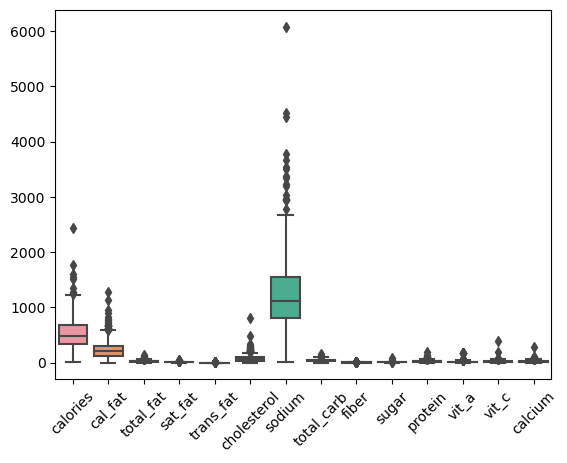

In [9]:
# spread of attributes
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

- Sodium Content have high spread in compare to others

<AxesSubplot:>

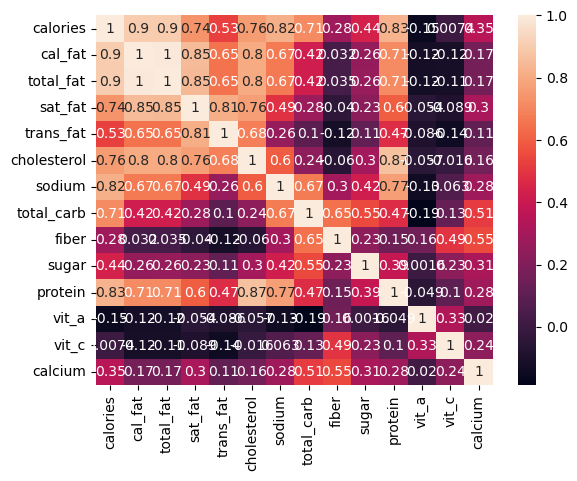

In [10]:
# 상관관계를 heatmap으로 확인한다. 밝을 수록 관계가 있다. 
sns.heatmap(df.corr(),annot=True)

- There is a Reasonable Correlation between Variable

<Figure size 1000x500 with 0 Axes>

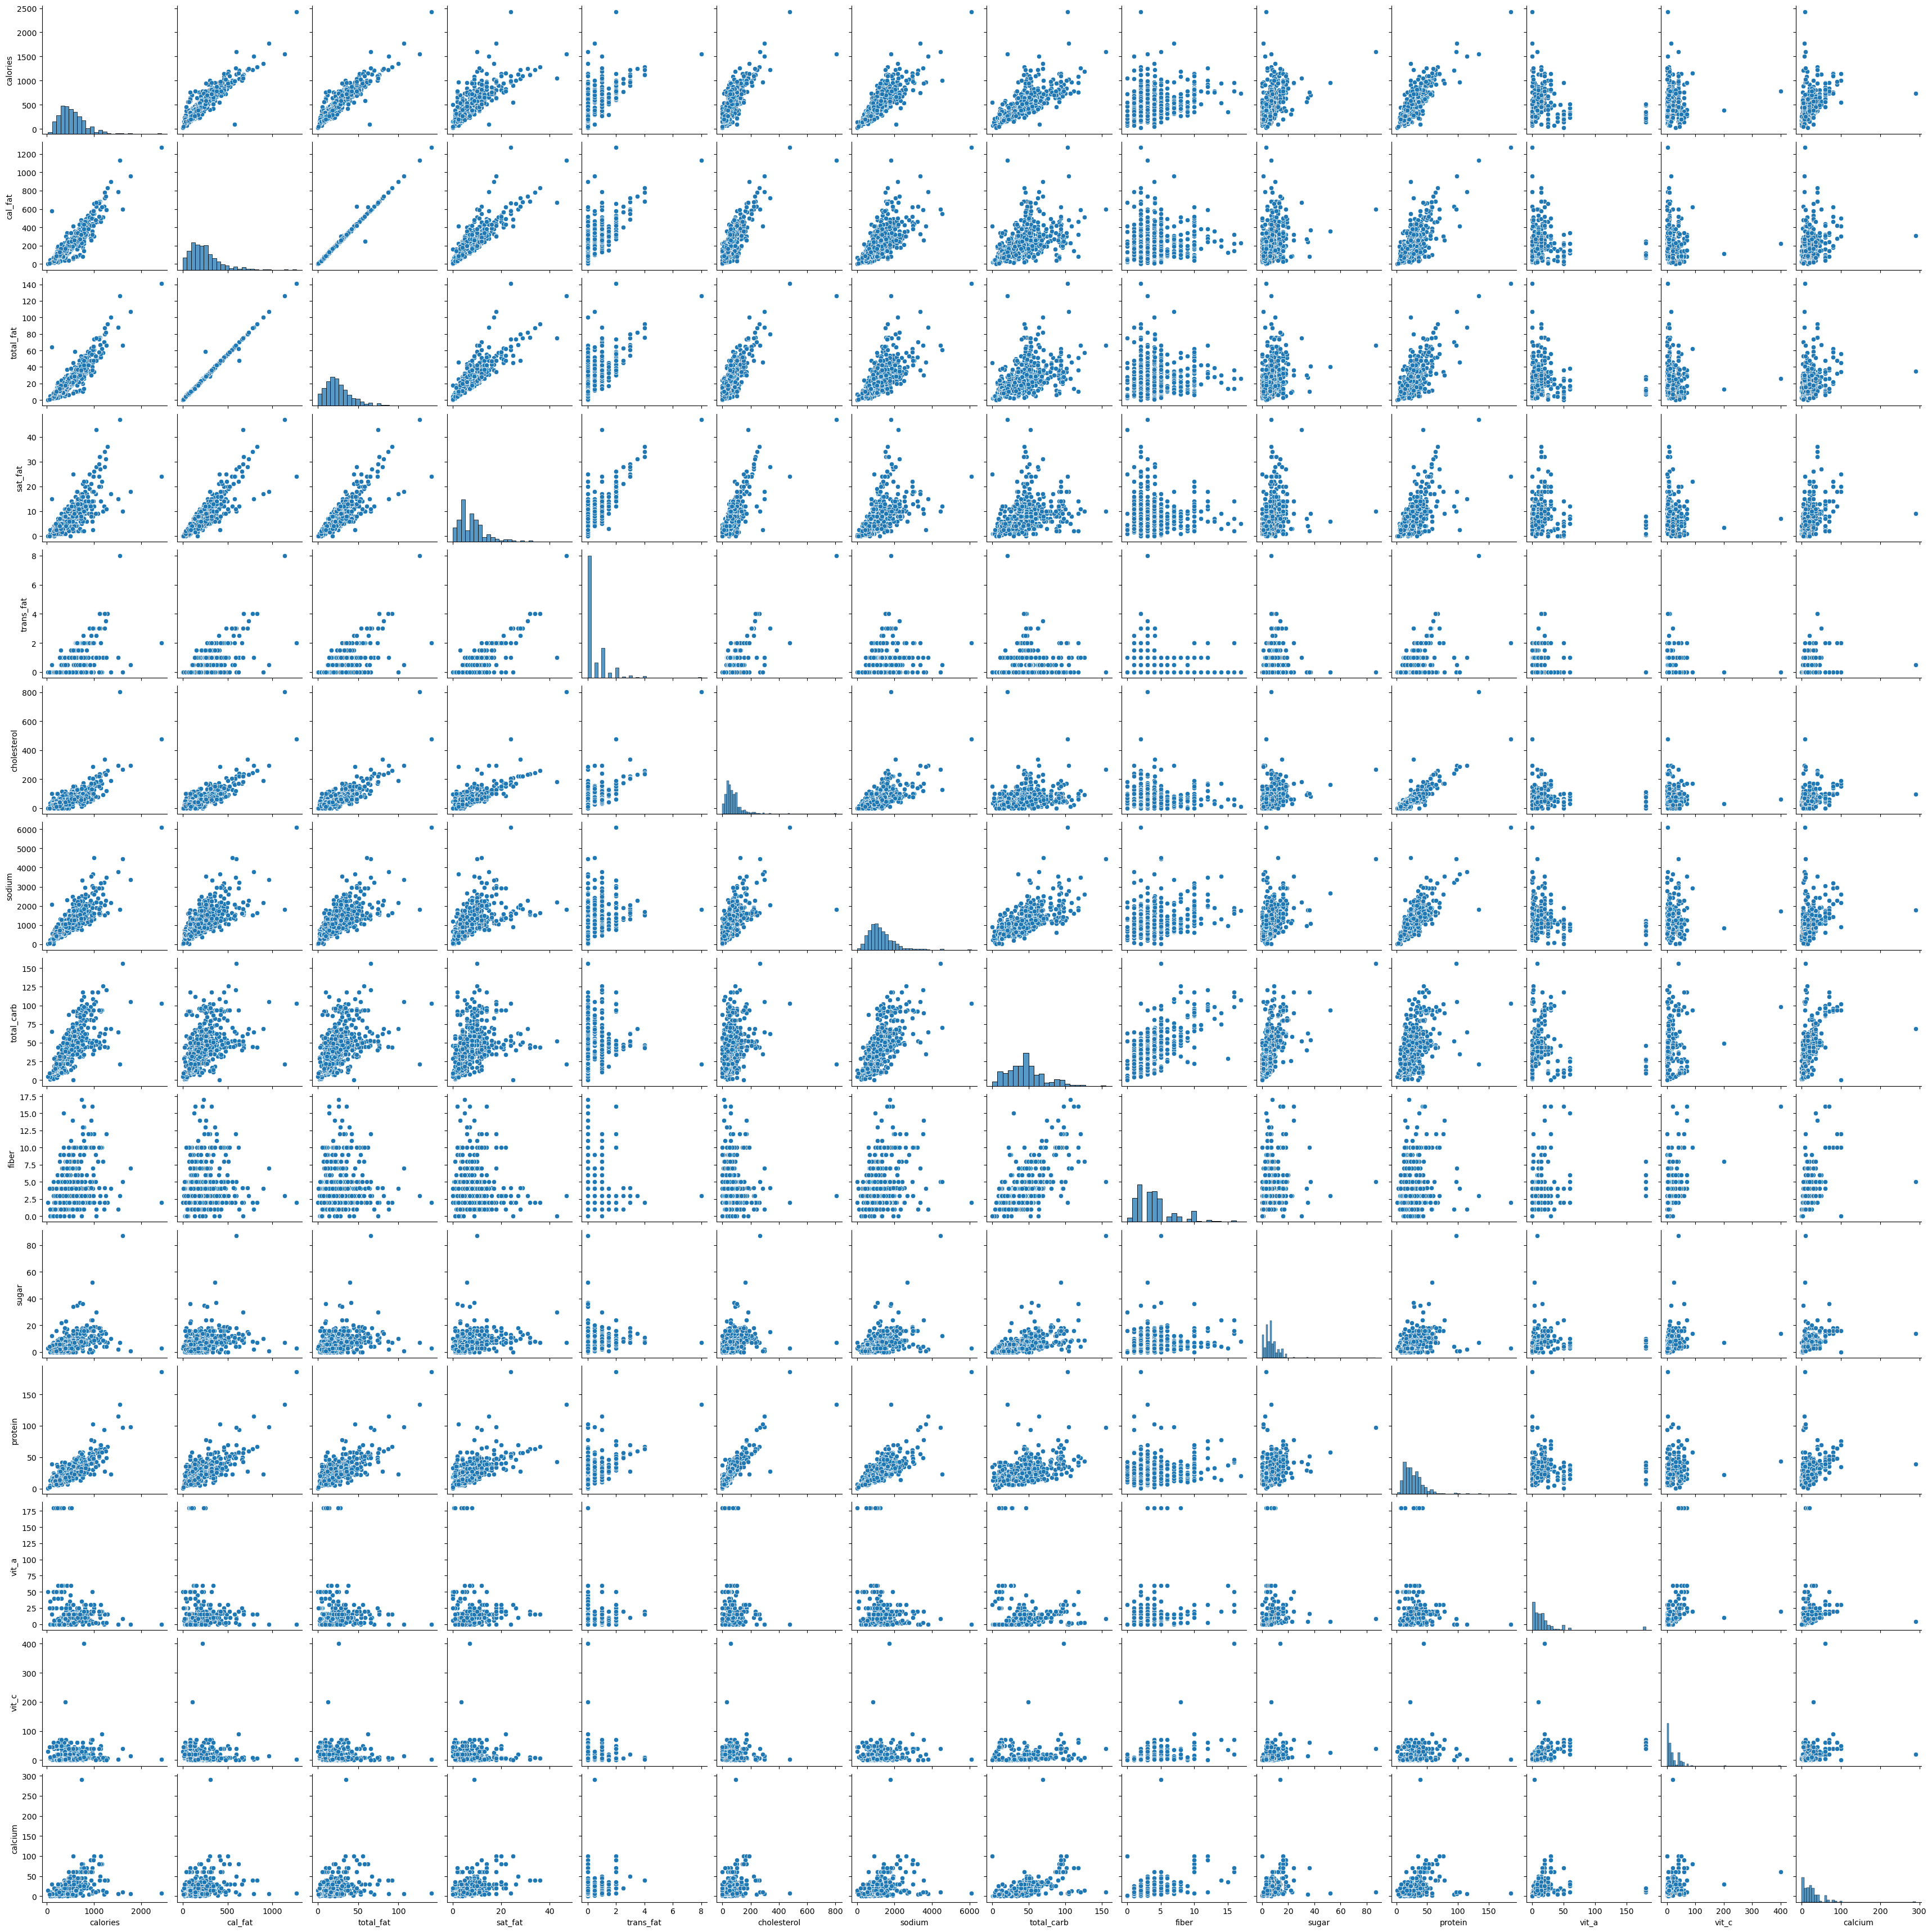

In [23]:
# This Can be further demonstrated by the pairplot

plt.figure(figsize=(10,5))
sns.pairplot(df)

# Insights 

In [20]:
# Mean Attributes by Restaurant
details = df.groupby('restaurant').mean().sort_values(by='calories',ascending=False)

# Highlight the highest and lowest value in each column with red and green background colors, respectively
highlighted = details.style.highlight_max(color='red').highlight_min(color='green')

# Display the highlighted DataFrame
display(highlighted)

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
restaurant,,,,,,,,,,,,,,
Mcdonalds,640.350877,285.614035,31.807018,8.289474,0.464912,109.736842,1437.894737,48.789474,3.228070,11.070175,40.298246,33.719298,18.298246,20.596491
Sonic,631.698113,338.301887,37.641509,11.415094,0.933962,86.981132,1350.754717,47.207547,2.660377,6.528302,29.188679,6.938776,5.755102,17.244898
Burger King,608.571429,333.757143,36.814286,11.150000,0.864286,100.857143,1223.571429,39.314286,2.633882,8.185714,29.984158,nan,nan,nan
Arbys,532.727273,237.836364,26.981818,7.972727,0.418182,70.454545,1515.272727,44.872727,2.709091,7.563636,29.254545,12.560000,8.400000,17.360000
Dairy Queen,520.238095,260.476190,28.857143,10.440476,0.678571,71.547619,1181.785714,38.690476,2.833333,6.357143,24.833333,14.000000,4.370370,16.407407
Subway,503.020833,165.104167,18.479167,6.197917,0.218750,61.302083,1272.968750,54.718750,6.562500,10.093750,30.312500,22.385417,41.968750,39.125000
Taco Bell,443.652174,188.000000,20.895652,6.591304,0.256522,39.043478,1013.913043,46.634783,5.713043,3.704348,17.417391,11.846154,4.538462,24.807692
Chick Fil-A,384.444444,145.370370,16.148148,4.111111,0.037037,79.074074,1151.481481,28.629630,2.454606,4.148148,31.703704,12.619048,14.080000,11.320000


**<span style="color:#682F2F;"> Which Restaurant have what content high and low is shown</span>**

**<span style="color:#682F2F;"> Like Mcdonalds Have High Calories Content then rest while chick Fil-A have relatively low-calorie, low-fat, and low-sugar content</span>**

**<span style="color:#682F2F;"> Thank You!</span>**



<div style="border-radius:10px;
        border :blue solid;
        padding: 15px;
        background-color:skyblue;
       font-size:110%;
        text-align: left">
<b>🎯 Recommended Work</b><br>
There's still alot to come, I will be doing further analysis by unsupervised learning However Everyone is encouraged to get More Insights From the Data <br>
    

**<span style="color:#682F2F;"> If you liked this Notebook, please do upvote, feel free to comment!</span>**

**<span style="color:#682F2F;"> Thank You!</span>**

**<span style="color:#682F2F;"> Happy Kaggling 🙂👊</span>**

콜레스트롤, 트랜스지방, 나트륨의 양이 적은 레스토랑

rank 함수 이용해서 콜레스트롤, 소금, 지방, 설탕이 모두 1사분위보다 작으면서 칼로리가 작은 순서대로 나열

sample_rank = sample.copy()
sample_rank['rank'] = sample[['time_spend_company', 'satisfaction_level']].apply(tuple, axis=1)\
                         .rank(method='dense', ascending=True).astype(np.int32)

display(sample_rank)

In [93]:
chol = df['cholesterol']<= np.quantile(df['cholesterol'], 0.25)
sodi = df['sodium']<= np.quantile(df['sodium'], 0.25)
fat = df['cal_fat'] <= np.quantile(df['cal_fat'], 0.25)
sugar= df['sugar'] <= np.quantile(df['sugar'], 0.5)

subset = df[chol & sodi & fat & sugar]

num = subset['restaurant'].value_counts()
num

Taco Bell      27
Subway         11
Arbys           7
Mcdonalds       2
Chick Fil-A     2
Burger King     2
Dairy Queen     2
Sonic           1
Name: restaurant, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

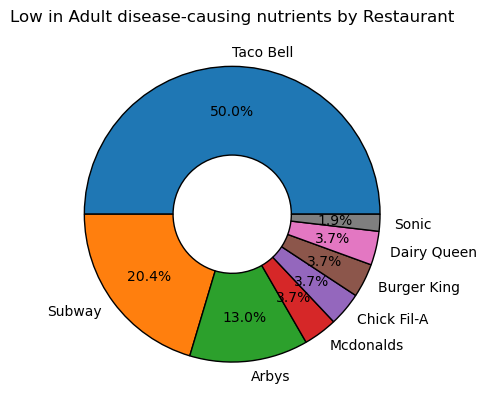

In [97]:

wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
plt.pie(num, labels = num.index, autopct = '%.1f%%', wedgeprops = wedgeprops, pctdistance = 0.7)
plt.title('Low in Adult disease-causing nutrients by Restaurant')
plt.show